# Classification of Handwritten Digits Using CNN

## Introduction

We create and train a simple Convolutional Neural Network (CNN) for classifying handwritten digits from a popular dataset.

## Convolutional Neural Network

<img src="https://editor.analyticsvidhya.com/uploads/42220New%20Microsoft%20PowerPoint%20Presentation.jpg" alt="CNN" width="500">


A CNN model consists of three primary layers: Convolutional Layer, Pooling layer(s), and fully connected layer.

(1) Convolutional Layer: This layer extracts high-level input features from input data and passes those features to the next layer in the form of feature maps.

(2) Pooling Layer: It is used to reduce the dimensions of data by applying pooling on the feature map to generate new feature maps with reduced dimensions. PL takes either maximum or average in the old feature map within a given stride.

(3) Fully-Connected Layer: Finally, the task of classification is done by the FC layer. Probability scores are calculated for each class label by a popular activation function called the softmax function.

### Dataset
The dataset that is being used here is the MNIST digits classification dataset. Keras is a deep learning API written in Python and MNIST is a dataset provided by this API. This dataset consists of 60,000 training images and 10,000 testing images from zero to nine (10 different classes).These images are the grayscaled pixel value and are represented as a 28×28 matrix.

## Loading the Dataset

In [9]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

In [10]:
mnist = tf.keras.datasets.mnist

In [11]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [12]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

## Processing the Dataset

Data has to be processed, cleaned, rectified in order to improve its quality. CNN will learn best from a dataset that does not contain any null values, has all numeric data, and is scaled. So, here we will perform some steps to ensure that our dataset is perfectly suitable for a CNN model to learn from

In [15]:
# scale the training and test datasets
X_train = X_train / 255
X_test = X_test / 255

In [16]:
# convert the 2-d matrix to a 1-d array
X_train = X_train.reshape(-1,28,28,1)    
X_test = X_test.reshape(-1,28,28,1) 

## Creating and Training CNN Model

In [18]:
# Define the CNN model
convolutional_neural_network = models.Sequential([
    layers.Conv2D(filters=25, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)), 
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # Output layer with 10 classes
])

C:\Users\sreya\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
convolutional_neural_network.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 25)     │           250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 25)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        14,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,452 (220.52 KB)

 Trainable params: 56,452 (220.52 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
# Compile the model
convolutional_neural_network.compile(optimizer='adam', 
                                     loss='sparse_categorical_crossentropy', 
                                     metrics=['accuracy'])

In [21]:
# Train the model
convolutional_neural_network.fit(X_train, y_train, epochs=5, batch_size=64)

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - accuracy: 0.8297 - loss: 0.5670
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9707 - loss: 0.0964
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9795 - loss: 0.0639
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9840 - loss: 0.0507
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9868 - loss: 0.0418


In the above model,there is an input layer followed by two hidden layers and finally an output layer.Activation functions are responsible for making decisions of whether or not to move forward. In deep neural network like CNN, there are many neurons, and based on activation functions, neurons fire up and the network moves forward

In [23]:
# Evaluate the model
test_loss, test_acc = convolutional_neural_network.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9806 - loss: 0.0682
Test accuracy: 0.9836999773979187


## Making Predictions

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


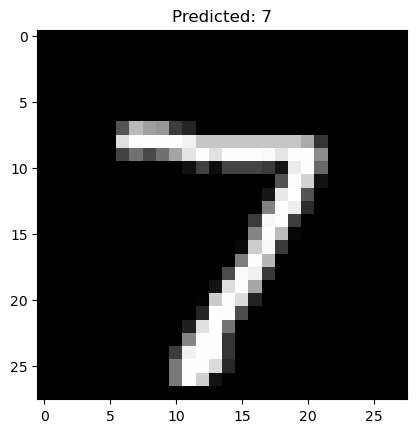

In [25]:
# Make predictions
y_predicted = convolutional_neural_network.predict(X_test)

# Get the predicted class for the first test image
predicted_class = np.argmax(y_predicted[0])

# Visualize the first test image and its predicted label
plt.imshow(X_test[0].reshape(28, 28), cmap='gray')  # Reshape to 28x28 and display in grayscale
plt.title(f"Predicted: {predicted_class}")  # Show the predicted class as title
plt.show()

## Conclusion

The popular dataset called MNIST was taken to make predictions of handwritten digits from 0 to 9. The dataset was cleaned, scaled, and shaped. Using TensorFlow, a CNN model was created and was eventually trained on the training dataset. Finally, predictions were made using the trained model.Here we get a model with accuracy 98%.